### Titanic Survival Prediction

### Classification Problem

#### import modules

In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [374]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### loading the data set

In [375]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [322]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [376]:
test.head(5)
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [377]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [378]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### exploratory data analysis

##### categorical attributes 



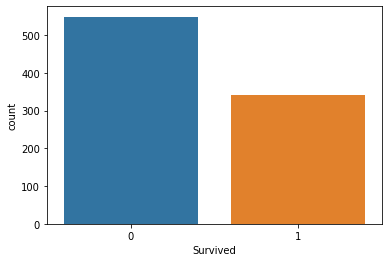

In [379]:
sns.countplot(train['Survived']);

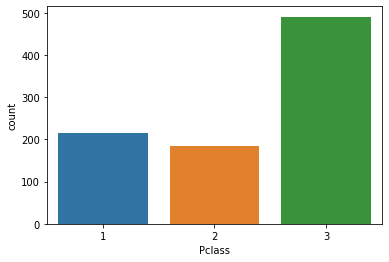

In [380]:
sns.countplot(train['Pclass']);

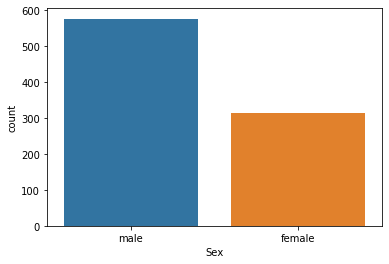

In [381]:
sns.countplot(train['Sex']);

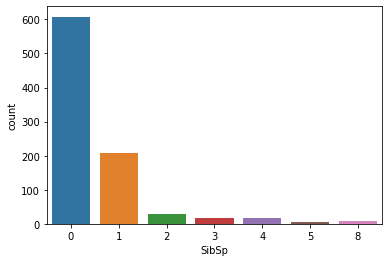

In [382]:
sns.countplot(train['SibSp']);

# 6.7. kategori boş gözüküyor, toplam veri sayısı grafikte gözükmemiştir.

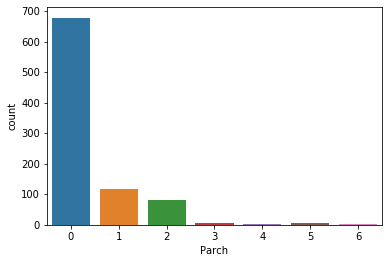

In [383]:
sns.countplot(train['Parch']);

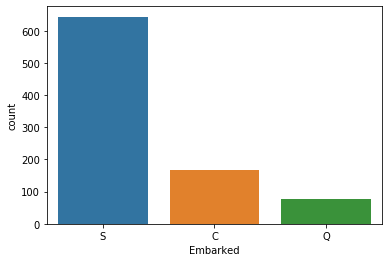

In [384]:
sns.countplot(train['Embarked']);

##### numerical attributes

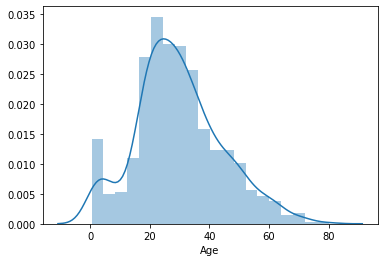

In [385]:
sns.distplot(train['Age']);

# 20-30 yaş aralıgının çogunlukta oldugunu görüyoruz.

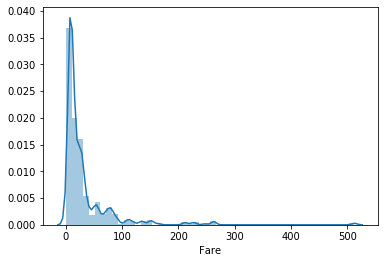

In [386]:
sns.distplot(train['Fare']);

##### pivot_table(index= , values, )

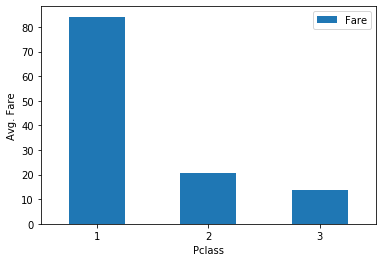

In [387]:
class_fare = train.pivot_table(index= 'Pclass', values= 'Fare') # fare ile pclass'ın ortak tablosunu görmüş olduk
class_fare.plot(kind= 'bar')
plt.xlabel('Pclass')
plt.xticks(rotation= 0)
plt.ylabel('Avg. Fare')
plt.show();

# Fare tablosunu incelediğimizde 0-100 arası yoğunluk oldugunu görmüştük, fare-pclass tablasunu incelediğimizde 1. sınıfın daha
# çok oldugunu gördük. Bunun sebebi 1. sınıf biletlerin daha ucuz olması yani bu iki grafik birbirini destekliyor.

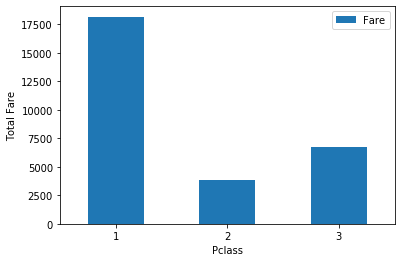

In [388]:
class_fare = train.pivot_table(index= 'Pclass', values= 'Fare', aggfunc= np.sum) 
class_fare.plot(kind= 'bar')
plt.xlabel('Pclass')
plt.xticks(rotation= 0)
plt.ylabel('Total Fare')
plt.show();

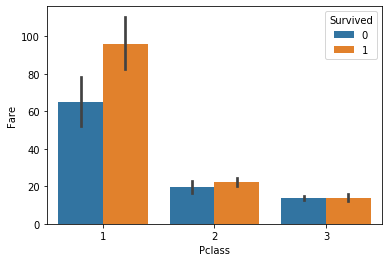

In [389]:
sns.barplot(data= train, x= 'Pclass', y= 'Fare', hue= 'Survived');

##### find the null values

In [390]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [391]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [392]:
train[['Age','Cabin','Embarked']].isnull().sum() * 100 / len(train)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [393]:
test[['Age','Cabin','Embarked']].isnull().sum() * 100 / len(test)

Age         20.574163
Cabin       78.229665
Embarked     0.000000
dtype: float64

##### fill missing values using mean of that numerical column

In [394]:
df = [train, test]
for data in df:
    mean = data['Age'].mean()
    std = data['Age'].std()
    is_null = data['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    age = data['Age'].copy()
    age[np.isnan(age)] = rand_age
    data['Age'] = age
    data['Age'] = data['Age'].astype(int)

In [395]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

##### fill missing values using mean of that categorical column

In [396]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Log transformation for uniform data disturbition

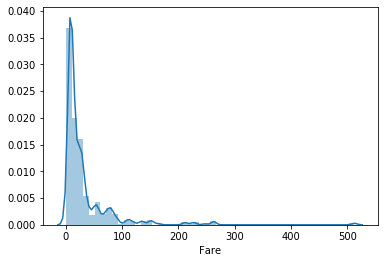

In [397]:
sns.distplot(train['Fare']);

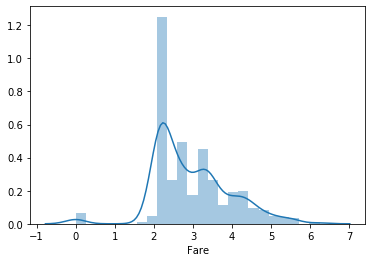

In [398]:
train['Fare'] = np.log(train['Fare']+1)
sns.distplot(train['Fare']);

#### Correlation Matrix

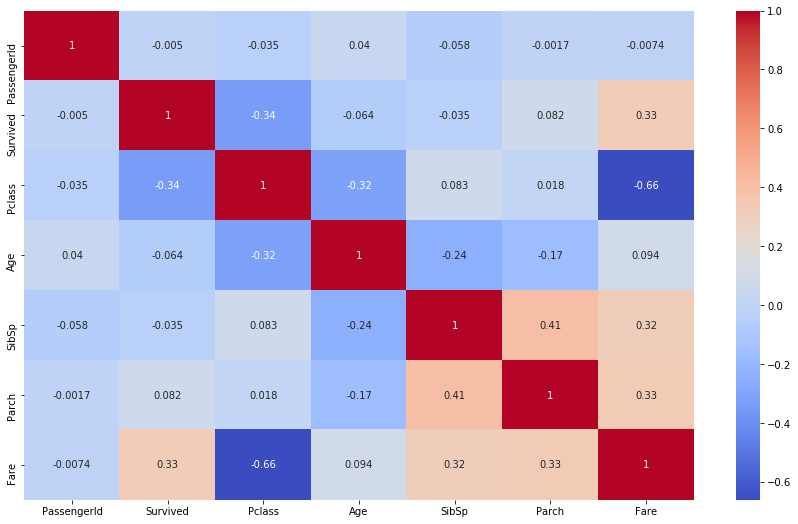

In [346]:
corr = train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

#### drop unnecessary columns 

In [399]:
train = train.drop(['PassengerId','Ticket','Cabin','Name'], axis=1)
test = test.drop(['PassengerId','Ticket','Cabin','Name'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,2.110213,S
1,1,1,female,38,1,0,4.280593,C
2,1,3,female,26,0,0,2.188856,S
3,1,1,female,35,1,0,3.990834,S
4,0,3,male,35,0,0,2.202765,S


##### encode categorical data

#### Label encoding 

In [400]:
train['Embarked'] = train['Embarked'].astype('category').cat.codes
test['Embarked'] = test['Embarked'].astype('category').cat.codes
train['Sex'] = train['Sex'].astype('category').cat.codes
test['Sex'] = test['Sex'].astype('category').cat.codes

##### input split

In [402]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
X_test  = test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,2.110213,2
1,1,0,38,1,0,4.280593,0
2,3,0,26,0,0,2.188856,2
3,1,0,35,1,0,3.990834,2
4,3,1,35,0,0,2.202765,2
...,...,...,...,...,...,...,...
886,2,1,27,0,0,2.639057,2
887,1,0,19,0,0,3.433987,2
888,3,0,33,1,2,3.196630,2
889,1,1,26,0,0,3.433987,0


##### Feature Scaling

In [403]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

### Model Trainning

##### classify column

In [281]:
from sklearn.model_selection import train_test_split, cross_val_score

In [404]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [405]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy:  0.7937219730941704
CV Score:  0.7867491055175445


In [406]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy:  0.7354260089686099
CV Score:  0.7576297784194338


In [1]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X, y)

NameError: name 'classify2' is not defined

In [408]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy:  0.7847533632286996
CV Score:  0.7923921913250893


In [409]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model, X, y)

Accuracy:  0.7847533632286996
CV Score:  0.8170987383089573


In [410]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model, X, y)

Accuracy:  0.8071748878923767
CV Score:  0.8249450756386919


## Complete Model Trainning with Full Data

In [426]:
model_lgbm = LGBMClassifier(random_state= 42,n_estimators=1000)
model_lgbm.fit(X,y)

y_pred_1 = model_lgbm.predict(X_test)
model_lgbm.score(X, y)

0.9820426487093153

#### Label encoding 

In [427]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
parameters = {'max_depth':[5, 6, 7, 8, 9],'min_samples_split':[2, 4, 8, 16],'min_samples_leaf':[2, 4, 8, 16, 32] }
scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(model_lgbm, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X, y)
best_model_lgbm = grid_fit.best_estimator_

best_model_lgbm.score(X, y)

0.9820426487093153

In [428]:
y_submission = best_model_lgbm.predict(X_test) 

### Test Submission

In [429]:
submission2 = pd.DataFrame({
        "PassengerId": pd.read_csv('test.csv')["PassengerId"],
        "Survived": y_submission
    })
submission2.to_csv('./submission2.csv', index=False)